In [1]:
import pandas as pd

In [22]:
path = '/home/mila/s/sonia.joseph/CLIP_AUDIT/clip_audit/data_parsing_human_evals/ TinyCLIP Audit (MLP-out)  .csv'
orig_df = pd.read_csv(path)

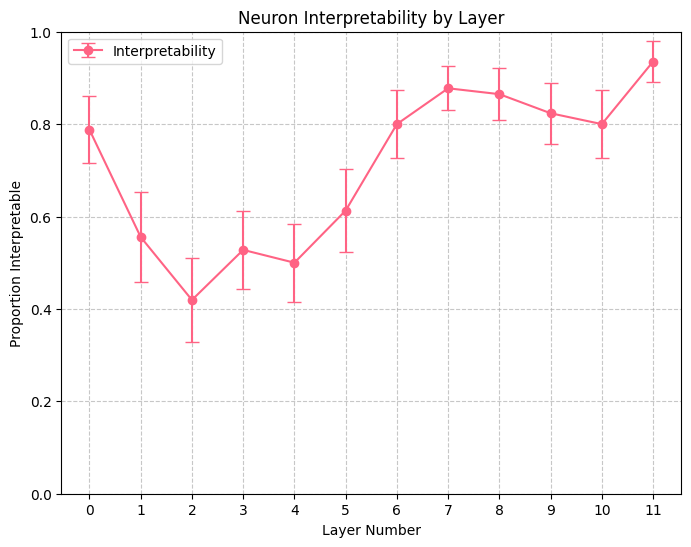

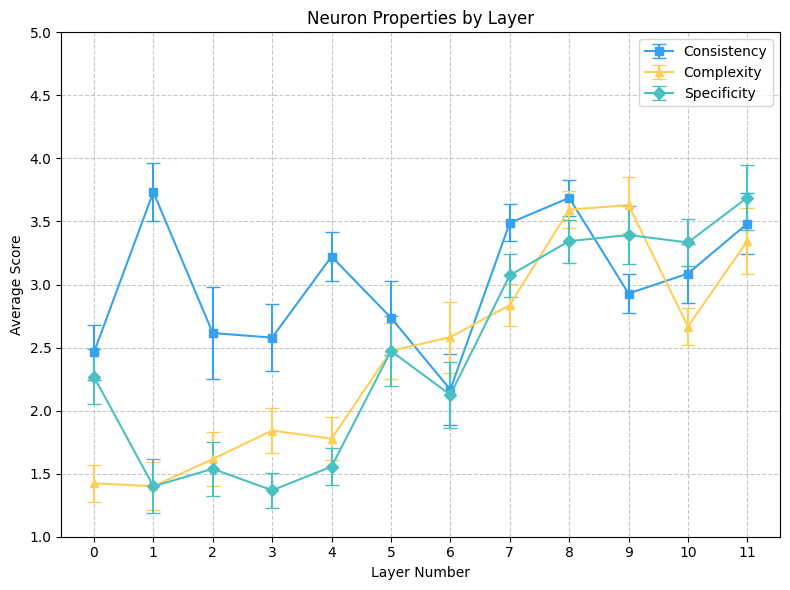

Number of neurons per layer:
Layer 0: 33
Layer 1: 27
Layer 2: 31
Layer 3: 36
Layer 4: 36
Layer 5: 31
Layer 6: 30
Layer 7: 49
Layer 8: 37
Layer 9: 34
Layer 10: 30
Layer 11: 31

Percentage of interpretable neurons per layer:
Layer 0: 78.79%
Layer 1: 55.56%
Layer 2: 41.94%
Layer 3: 52.78%
Layer 4: 50.00%
Layer 5: 61.29%
Layer 6: 80.00%
Layer 7: 87.76%
Layer 8: 86.49%
Layer 9: 82.35%
Layer 10: 80.00%
Layer 11: 93.55%


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load the data
# data = pd.read_csv('your_data.csv', sep='\t')  # Adjust the filename as needed

# Filter for layers 0-11
data = data[data['Layer Number'].between(0, 11)]

# Convert interpretability to boolean
interpretability_column = 'Is the neuron CLEARLY human interpretable?\n\nYes - you can concisely describe it in language.\n\nNo - there is a lot of ambiguity, confusion, and you find it difficult to describe in words (although there may be some discernable pattern).\n'
data['Interpretable'] = data[interpretability_column] == 'Yes'

# Get unique layers
layers = sorted(data['Layer Number'].unique())

# Initialize dictionaries to store results
metrics = {
    'Interpretability': {'mean': [], 'sem': []},
    'Consistency': {'mean': [], 'sem': []},
    'Complexity': {'mean': [], 'sem': []},
    'Specificity': {'mean': [], 'sem': []},
    'Polysemantic': {'count': []}
}

# Calculate statistics for each layer
for layer in layers:
    layer_data = data[data['Layer Number'] == layer]
    
    # Interpretability
    interp_values = layer_data['Interpretable']
    metrics['Interpretability']['mean'].append(interp_values.mean())
    metrics['Interpretability']['sem'].append(stats.sem(interp_values) if len(interp_values) > 1 else 0)
    
    # Other metrics (only for interpretable neurons)
    interpretable_data = layer_data[layer_data['Interpretable']]
    
    for metric, column in [
        ('Consistency', 'If interpretable, what is the consistency of this neuron (1 is least, 5 is most)'),
        ('Complexity', 'If interpretable, what is the complexity of this neuron? (1 is least, 5 is most)'),
        ('Specificity', 'If interpretable, what is the specificity of this neuron? (1 is least, 5 is most)')
    ]:
        values = interpretable_data[column].dropna()
        metrics[metric]['mean'].append(values.mean() if len(values) > 0 else np.nan)
        metrics[metric]['sem'].append(stats.sem(values) if len(values) > 1 else 0)
    
    # Polysemantic count
    polysemantic_count = interpretable_data['If interpretable, is this neuron polysemantic?'].eq('Yes').sum()
    metrics['Polysemantic']['count'].append(polysemantic_count)

# Create two separate plots
fig1, ax1 = plt.subplots(figsize=(8, 6))
fig2, ax2 = plt.subplots(figsize=(8, 6))

# Plot Interpretability
ax1.errorbar(layers, metrics['Interpretability']['mean'], yerr=metrics['Interpretability']['sem'], 
             label='Interpretability', color='#FF6384', capsize=5, marker='o')
ax1.set_ylabel('Proportion Interpretable')
ax1.set_title('Neuron Interpretability by Layer')
ax1.set_ylim(0, 1)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend()

# Plot other metrics
styles = {
    'Consistency': {'color': '#36A2EB', 'marker': 's'},
    'Complexity': {'color': '#FFCE56', 'marker': '^'},
    'Specificity': {'color': '#4BC0C0', 'marker': 'D'}
}
for metric, style in styles.items():
    ax2.errorbar(layers, metrics[metric]['mean'], yerr=metrics[metric]['sem'], 
                 label=metric, color=style['color'], capsize=5, marker=style['marker'])
ax2.set_ylabel('Average Score')
ax2.set_title('Neuron Properties by Layer')
ax2.set_ylim(1, 5)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend()

# Common x-axis label and ticks
for ax in [ax1, ax2]:
    ax.set_xlabel('Layer Number')
    ax.set_xticks(layers)

plt.tight_layout()
plt.show()

# Print some statistics
print("Number of neurons per layer:")
for layer in layers:
    print(f"Layer {layer}: {len(data[data['Layer Number'] == layer])}")

print("\nPercentage of interpretable neurons per layer:")
for layer, percentage in zip(layers, metrics['Interpretability']['mean']):
    print(f"Layer {layer}: {percentage*100:.2f}%")

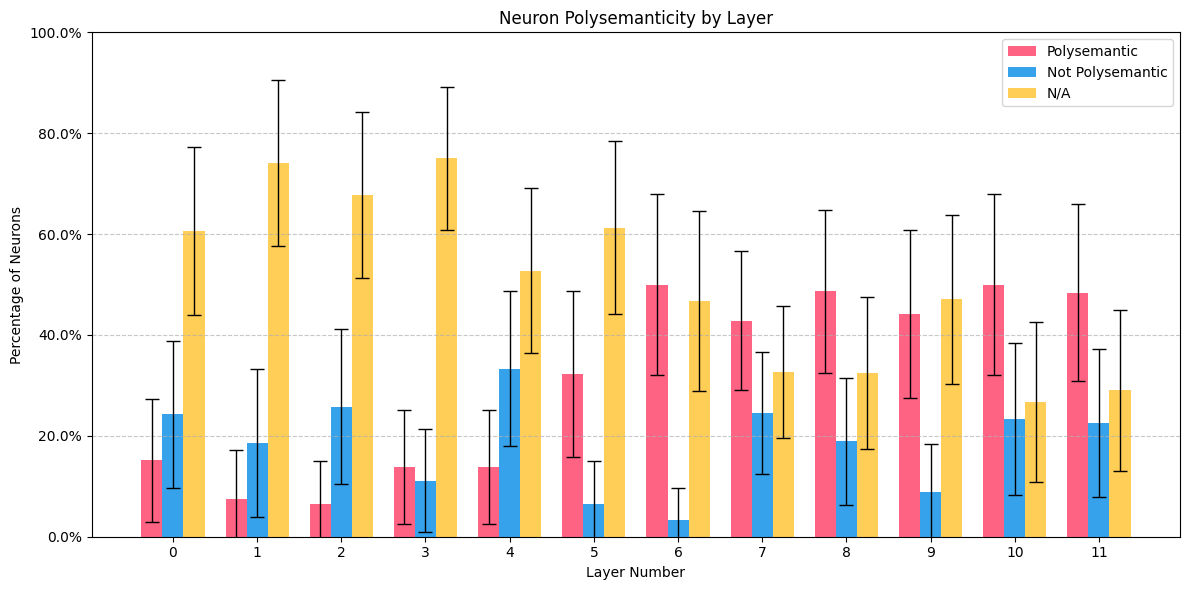

Number of neurons per layer:
Layer 0: 33
Layer 1: 27
Layer 2: 31
Layer 3: 36
Layer 4: 36
Layer 5: 31
Layer 6: 30
Layer 7: 49
Layer 8: 37
Layer 9: 34
Layer 10: 30
Layer 11: 31

Percentage of polysemantic neurons per layer:
Layer 0: 15.15%
Layer 1: 7.41%
Layer 2: 6.45%
Layer 3: 13.89%
Layer 4: 13.89%
Layer 5: 32.26%
Layer 6: 50.00%
Layer 7: 42.86%
Layer 8: 48.65%
Layer 9: 44.12%
Layer 10: 50.00%
Layer 11: 48.39%


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Load the data
# data = pd.read_csv('your_data.csv', sep='\t')  # Adjust the filename as needed

# Filter for layers 0-11
data = data[data['Layer Number'].between(0, 11)]

# Convert interpretability to boolean
interpretability_column = 'Is the neuron CLEARLY human interpretable?\n\nYes - you can concisely describe it in language.\n\nNo - there is a lot of ambiguity, confusion, and you find it difficult to describe in words (although there may be some discernable pattern).\n'
data['Interpretable'] = data[interpretability_column] == 'Yes'

# Get unique layers
layers = sorted(data['Layer Number'].unique())

# Initialize dictionary to store results
polysemantic_stats = {layer: {'Polysemantic': 0, 'Not Polysemantic': 0, 'N/A': 0, 'Total': 0} for layer in layers}

# Calculate statistics for each layer
for layer in layers:
    layer_data = data[data['Layer Number'] == layer]
    total_neurons = len(layer_data)
    
    interpretable_data = layer_data[layer_data['Interpretable']]
    polysemantic_column = 'If interpretable, is this neuron polysemantic?'
    
    polysemantic_count = interpretable_data[polysemantic_column].eq('Yes').sum()
    not_polysemantic_count = interpretable_data[polysemantic_column].eq('No').sum()
    na_count = total_neurons - polysemantic_count - not_polysemantic_count
    
    polysemantic_stats[layer]['Polysemantic'] = polysemantic_count
    polysemantic_stats[layer]['Not Polysemantic'] = not_polysemantic_count
    polysemantic_stats[layer]['N/A'] = na_count
    polysemantic_stats[layer]['Total'] = total_neurons

# Prepare data for plotting
categories = ['Polysemantic', 'Not Polysemantic', 'N/A']
percentages = {cat: [] for cat in categories}
errors = {cat: [] for cat in categories}

for layer in layers:
    total = polysemantic_stats[layer]['Total']
    for cat in categories:
        count = polysemantic_stats[layer][cat]
        p = count / total
        percentages[cat].append(p * 100)
        
        # Calculate binomial proportion confidence interval
        z = norm.ppf(0.975)  # 95% confidence interval
        error = z * np.sqrt(p * (1 - p) / total) * 100
        errors[cat].append(error)

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(layers))  # the label locations
width = 0.25  # the width of the bars

colors = ['#FF6384', '#36A2EB', '#FFCE56']
for i, cat in enumerate(categories):
    ax.bar(x + (i - 1) * width, percentages[cat], width, label=cat, color=colors[i],
           yerr=errors[cat], capsize=5, error_kw={'elinewidth': 1, 'capthick': 1})

# Customize the plot
ax.set_ylabel('Percentage of Neurons')
ax.set_xlabel('Layer Number')
ax.set_title('Neuron Polysemanticity by Layer')
ax.set_xticks(x)
ax.set_xticklabels(layers)
ax.legend()

# Set y-axis to percentage
ax.set_ylim(0, 100)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.1f}%"))

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.tight_layout()
plt.show()

# Print some statistics
print("Number of neurons per layer:")
for layer in layers:
    print(f"Layer {layer}: {polysemantic_stats[layer]['Total']}")

print("\nPercentage of polysemantic neurons per layer:")
for layer in layers:
    percentage = polysemantic_stats[layer]['Polysemantic'] / polysemantic_stats[layer]['Total'] * 100
    print(f"Layer {layer}: {percentage:.2f}%")

AttributeError: module 'scipy.stats' has no attribute 'cohen_kappa_score'

In [73]:
data

,Timestamp,Auditor Name,Layer Number,Neuron/Feature Number,"Is the neuron CLEARLY human interpretable?\n\nYes - you can concisely describe it in language.\n\nNo - there is a lot of ambiguity, confusion, and you find it difficult to describe in words (although there may be some discernable pattern).\n","Write one high-level description of the neuron in English. Be as specific as possible.\n\nIf there is a pattern across the intervals, write down the pattern.","If interpretable, what is the consistency of this neuron (1 is least, 5 is most)","If interpretable, what is the complexity of this neuron? (1 is least, 5 is most)","If interpretable, what is the specificity of this neuron? (1 is least, 5 is most)","If interpretable, is this neuron polysemantic?","If so, how many categories?",What are the polysemantic categories?,What type(s) of feature does this neuron show?\n,Is this neuron a candidate for a spotlight?\n\nThis neuron is particularly interesting or compelling in some way and worthy of potentially being showcased on a blog post.,"Any other notes? If you think this neuron is particularly interesting, then take note here! (optional)",Interpretable
0,2024/07/12 7:21:27 PM MDT,Sagar,1,511,No,High frequency changing textures or patterns.,2.0,2.0,1.0,N/A (not interpretable),NaN,NaN,N/A or Unclear or Non-Interpretable,NaN,NaN,False
1,2024/07/12 7:25:00 PM MDT,Sagar,1,508,Yes,Vertical line patterns,5.0,2.0,1.0,No,NaN,NaN,Spatially Localized Feature,NaN,NaN,True
2,2024/07/15 8:38:09 AM MDT,Sonia,8,6,No,"Detecting edges / circles, possibly red, some ...",2.0,2.0,1.0,Yes,2,NaN,Segmentation Map Feature (e.g. swathes of back...,NaN,NaN,False
3,2024/07/15 8:46:30 AM MDT,Sonia,8,147,Yes,"Branches of trees, sometimes with monkeys in t...",3.0,3.0,3.0,Yes,2,NaN,Spatially Localized Feature,NaN,NaN,True
4,2024/07/15 8:54:25 AM MDT,Daniel,1,3,Yes,"Detecting sticks / edges / long, thin shapes t...",4.0,1.0,2.0,No,NaN,NaN,Spatially Localized Feature,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,2024/07/17 9:50:18 PM MDT,Sonia,11,415,Yes,text,2.0,2.0,2.0,Yes,3,NaN,Spatially Localized Feature,NaN,NaN,True
403,2024/07/17 9:52:21 PM MDT,Sonia,11,416,Yes,"Sofas, beds, furniture",3.0,2.0,2.0,Yes,4+,"Beds, cats, random objects",N/A or Unclear or Non-Interpretable,NaN,NaN,True
404,2024/07/17 9:53:24 PM MDT,Sonia,11,425,Yes,"Animal faces, buses, cars, transportation, edges",1.0,1.0,1.0,NaN,1,"Buses, cars, transportation",Spatially Localized Feature,NaN,NaN,True
405,2024/07/17 9:55:05 PM MDT,Sonia,11,434,No,"Not clear pattern, might be people?",NaN,NaN,NaN,NaN,NaN,NaN,N/A or Unclear or Non-Interpretable,NaN,NaN,False


In [79]:
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Load the data
# Assuming your data is in a CSV file named 'neuron_data.csv'

# Define the columns for each metric
metrics = {
    'Interpretability': 'Is the neuron CLEARLY human interpretable?\n\nYes - you can concisely describe it in language.\n\nNo - there is a lot of ambiguity, confusion, and you find it difficult to describe in words (although there may be some discernable pattern).\n',
    'Consistency': 'How consistent is the neuron\'s behavior?',
    'Complexity': 'How complex is the concept that the neuron represents?',
    'Specificity': 'How specific is the concept that the neuron represents?'
}

# Function to calculate agreement percentage
def agreement_percentage(evaluator1, evaluator2):
    return np.mean(evaluator1 == evaluator2) * 100

# Function to compare auditors
def compare_auditors(data, metric, column):
    results = []
    auditors = data['Auditor Name'].unique()
    for auditor1, auditor2 in combinations(auditors, 2):
        df1 = data[data['Auditor Name'] == auditor1]
        df2 = data[data['Auditor Name'] == auditor2]
        merged = pd.merge(df1, df2, on=['Layer Number', 'Neuron/Feature Number'], suffixes=('_1', '_2'))
        kappa = cohen_kappa(merged[f'{column}_1'], merged[f'{column}_2'])
        agreement = agreement_percentage(merged[f'{column}_1'], merged[f'{column}_2'])
        results.append({
            'Metric': metric,
            'Auditor 1': auditor1,
            'Auditor 2': auditor2,
            'Cohen\'s Kappa': kappa,
            'Agreement (%)': agreement
        })
    return pd.DataFrame(results)

# Compare auditors for all metrics
all_results = pd.DataFrame()
for metric, column in metrics.items():
    results = compare_auditors(data, metric, column)
    all_results = pd.concat([all_results, results])

# Print results
print(all_results)

# Visualize results
plt.figure(figsize=(15, 8))
sns.barplot(x='Metric', y='Cohen\'s Kappa', hue='Auditor 1', data=all_results)
plt.title('Inter-rater Reliability (Cohen\'s Kappa)')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(x='Metric', y='Agreement (%)', hue='Auditor 1', data=all_results)
plt.title('Inter-rater Agreement (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate average agreement and kappa for each metric
avg_results = all_results.groupby('Metric')[['Cohen\'s Kappa', 'Agreement (%)']].mean()
print("\nAverage Results:")
print(avg_results)

# Analyze agreement by layer
def agreement_by_layer(data, metric, column):
    results = []
    auditors = data['Auditor Name'].unique()
    for layer in data['Layer Number'].unique():
        layer_data = data[data['Layer Number'] == layer]
        for auditor1, auditor2 in combinations(auditors, 2):
            df1 = layer_data[layer_data['Auditor Name'] == auditor1]
            df2 = layer_data[layer_data['Auditor Name'] == auditor2]
            merged = pd.merge(df1, df2, on='Neuron Number', suffixes=('_1', '_2'))
            agreement = agreement_percentage(merged[f'{column}_1'], merged[f'{column}_2'])
            results.append({
                'Layer': layer,
                'Metric': metric,
                'Auditor Pair': f'{auditor1}-{auditor2}',
                'Agreement (%)': agreement
            })
    return pd.DataFrame(results)

layer_results = pd.DataFrame()
for metric, column in metrics.items():
    results = agreement_by_layer(data, metric, column)
    layer_results = pd.concat([layer_results, results])

# Visualize agreement by layer
plt.figure(figsize=(20, 15))
for i, (metric, column) in enumerate(metrics.items(), 1):
    plt.subplot(2, 2, i)
    sns.lineplot(x='Layer', y='Agreement (%)', hue='Auditor Pair', 
                 data=layer_results[layer_results['Metric'] == metric], marker='o')
    plt.title(f'Inter-rater Agreement by Layer ({metric})')
    plt.ylim(0, 100)
    plt.legend(title='Auditor Pair', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
plt.show()

# Calculate average agreement by layer for each metric
avg_layer_results = layer_results.groupby(['Metric', 'Layer'])['Agreement (%)'].mean().reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(x='Layer', y='Agreement (%)', hue='Metric', data=avg_layer_results, marker='o')
plt.title('Average Inter-rater Agreement by Layer')
plt.ylim(0, 100)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

AttributeError: module 'scipy.stats' has no attribute 'cohen_kappa_score'